In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid
import tensorflow as tf
from tensorflow.keras import layers, models
import gc
from tensorflow import keras
from tensorflow.keras.utils import to_categorical



2024-11-11 18:02:50.154436: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-11 18:02:50.262930: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-11 18:02:50.356849: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731328370.490277   39751 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731328370.513144   39751 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 18:02:50.724023: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

PART 1- Preprocessing and 10 sample visualization

In [3]:
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

In [4]:
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')
train_subset = train_data.iloc[:8000]
test_subset = test_data.iloc[:2000]

Y_train = train_subset['label'].values
X_train = train_subset.drop('label', axis=1).values


In [5]:
x_train = X_train[:7200]
y_train = Y_train[:7200]
x_val = X_train[7200:]
y_val = Y_train[7200:]

y_test = test_subset['label'].values
X_test = test_subset.drop('label', axis=1).values


In [6]:
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0
x_val_normalized = x_val / 255.0 
x_train_normalized = x_train / 255.0 

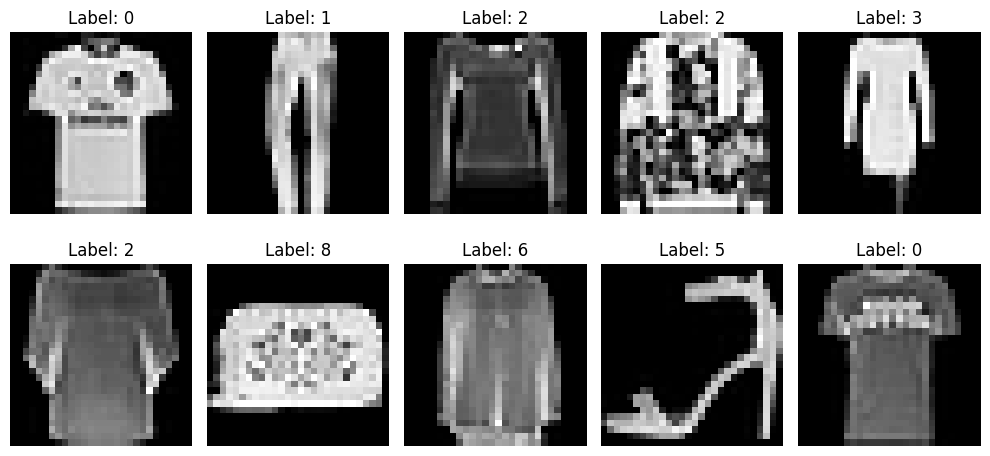

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_normalized[i].reshape(28, 28), cmap='gray')  
    plt.title(f'Label: {y_test[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

Part 2 - Activation function loss vs epoch graph

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32),
                    max_iter=100,
                    solver='adam',
                    batch_size=128,
                    learning_rate_init=2e-5,
                    activation='logistic',
                    random_state=42,
                    warm_start=True) 

In [9]:
train_losses = []
val_losses = []


In [10]:
for epoch in tqdm(range(100), desc="Training MLP"):
    mlp.partial_fit(x_train_normalized, y_train, classes=np.unique(y_train)) 
    
    train_losses.append(mlp.loss_)
    
    val_predictions = mlp.predict(x_val_normalized)  
    val_loss = np.mean((val_predictions != y_val).astype(float))  
    val_losses.append(val_loss)


Training MLP: 100%|██████████| 100/100 [01:44<00:00,  1.04s/it]


In [11]:
predictions = mlp.predict(X_test_normalized) 
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy on test set: {accuracy:.4f}')

Accuracy on test set: 0.4375


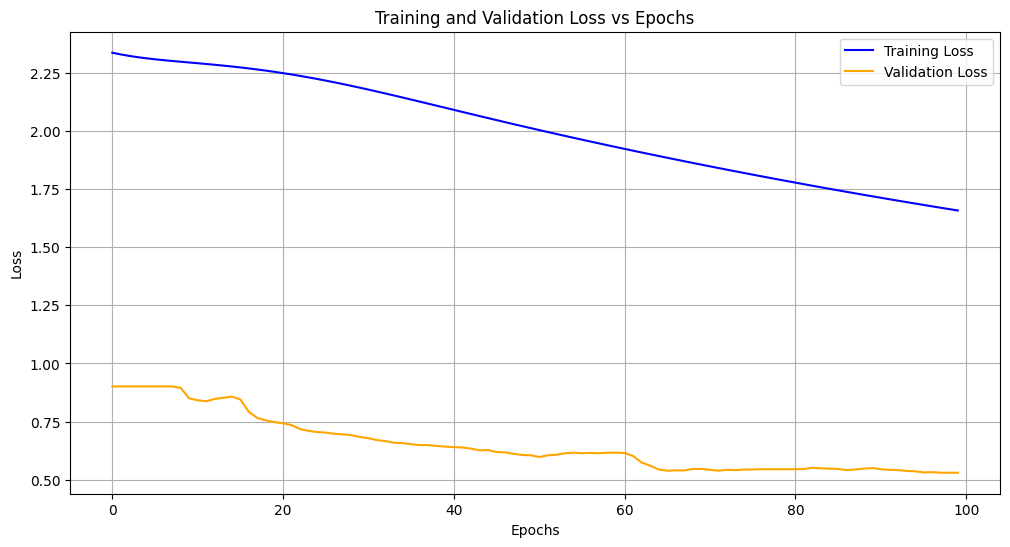

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32),
                    max_iter=100,
                    solver='adam',
                    batch_size=128,
                    learning_rate_init=2e-5,
                    activation='tanh',
                    random_state=42,
                    warm_start=True) 

In [14]:
train_losses = []
val_losses = []


In [15]:
for epoch in tqdm(range(100), desc="Training MLP"):
    mlp.partial_fit(x_train_normalized, y_train, classes=np.unique(y_train)) 
    
    train_losses.append(mlp.loss_)
    
    val_predictions = mlp.predict(x_val_normalized)  
    val_loss = np.mean((val_predictions != y_val).astype(float))  
    val_losses.append(val_loss)


Training MLP: 100%|██████████| 100/100 [01:51<00:00,  1.12s/it]


In [16]:
predictions = mlp.predict(X_test_normalized) 
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy on test set: {accuracy:.4f}')

Accuracy on test set: 0.8300


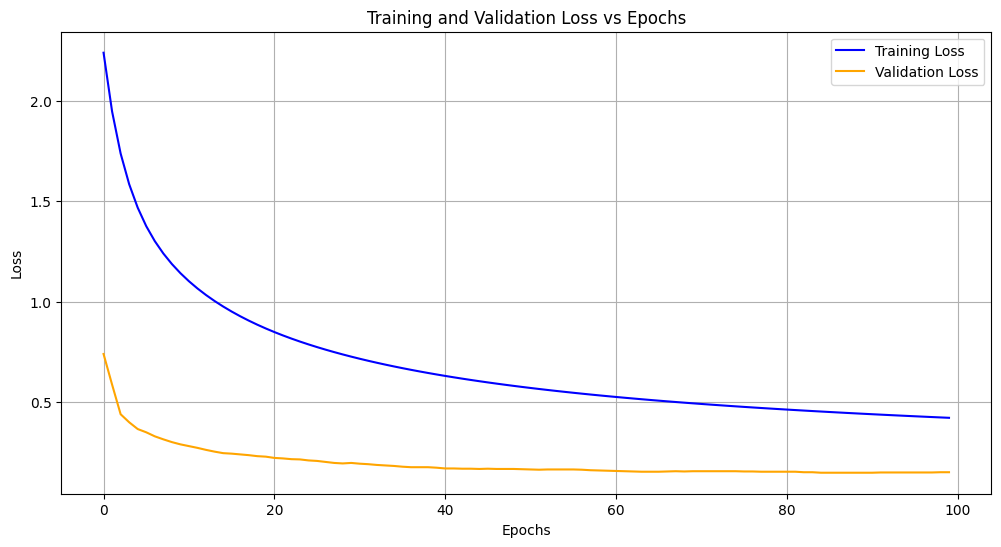

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32),
                    max_iter=100,
                    solver='adam',
                    batch_size=128,
                    learning_rate_init=2e-5,
                    activation='relu',
                    random_state=42,
                    warm_start=True) 

In [19]:
train_losses=[]
val_losses=[]

In [20]:
for epoch in tqdm(range(100), desc="Training MLP"):
    mlp.partial_fit(x_train_normalized, y_train, classes=np.unique(y_train)) 
    
    train_losses.append(mlp.loss_)
    
    val_predictions = mlp.predict(x_val_normalized)  
    val_loss = np.mean((val_predictions != y_val).astype(float))  
    val_losses.append(val_loss)


Training MLP: 100%|██████████| 100/100 [01:43<00:00,  1.03s/it]


In [ ]:
predictions = mlp.predict(X_test_normalized) 
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy on test set: {accuracy:.4f}')

Accuracy on test set: 0.8290


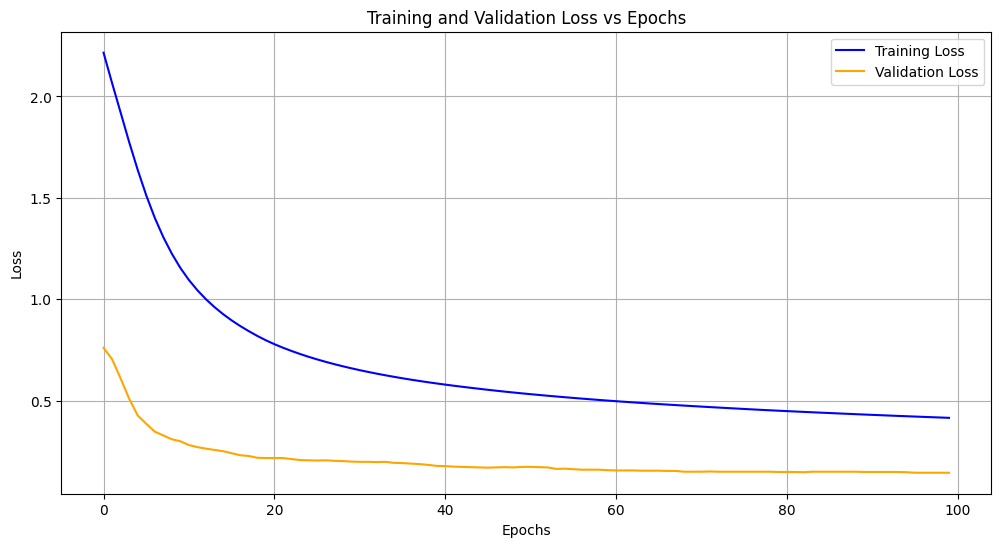

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [23]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32),
                    max_iter=100,
                    solver='adam',
                    batch_size=128,
                    learning_rate_init=2e-5,
                    activation='identity',
                    random_state=42,
                    warm_start=True) 

In [24]:
train_losses=[]
val_losses=[]

In [25]:
for epoch in tqdm(range(100), desc="Training MLP"):
    mlp.partial_fit(x_train_normalized, y_train, classes=np.unique(y_train)) 
    
    train_losses.append(mlp.loss_)
    
    val_predictions = mlp.predict(x_val_normalized)  
    val_loss = np.mean((val_predictions != y_val).astype(float))  
    val_losses.append(val_loss)


Training MLP: 100%|██████████| 100/100 [01:42<00:00,  1.02s/it]


In [26]:
predictions = mlp.predict(X_test_normalized) 
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy on test set: {accuracy:.4f}')

Accuracy on test set: 0.8260


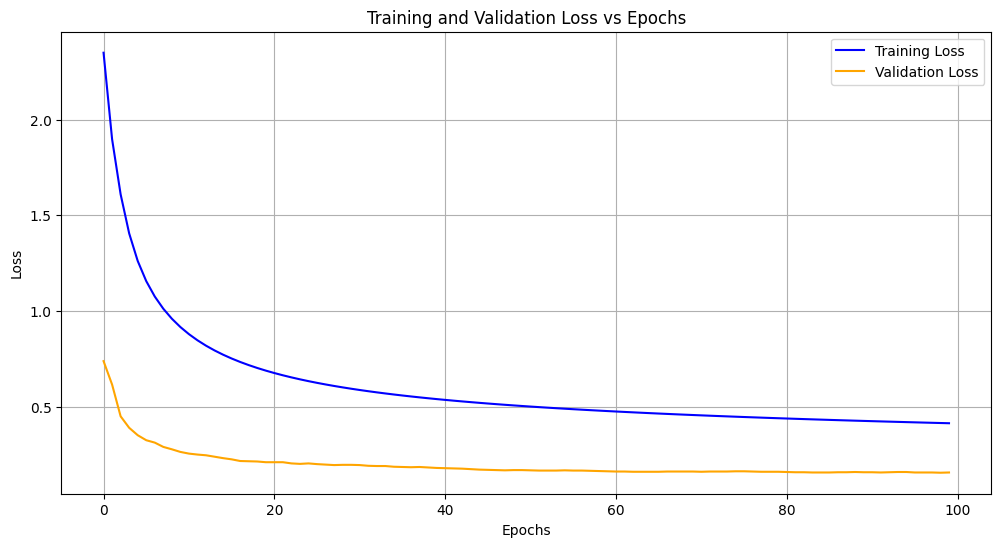

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

Part3 - Hyperparameter tuning using Hyperparameter

In [28]:
param_grid = {
    'hidden_layer_sizes': [(50,), (50, 50)],
    'activation': ['tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01],
    'batch_size': [32, 128]
}

In [29]:
best_score = -np.inf
best_params = None

In [30]:
grid = ParameterGrid(param_grid)


In [31]:
for params in tqdm(grid, desc="Hyperparameter tuning"):
    model = MLPClassifier(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        activation=params['activation'],
        solver=params['solver'],
        learning_rate_init=params['learning_rate_init'],
        batch_size=params['batch_size'],
        max_iter=50, 
        random_state=42
    )
    
    model.fit(x_train_normalized, y_train)
    
    score = model.score(x_val_normalized, y_val)  
    
    if score > best_score:
        best_score = score
        best_params = params

Hyperparameter tuning:   0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
Hyperparameter tuning:   6%|▋         | 1/16 [00:44<11:07, 44.53s/it]/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
Hyperparameter tuning:  19%|█▉        | 3/16 [02:05<09:00, 41.54s/it]/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
Hyperparameter tuning:  25%|██▌       | 4/16 [02:41<07:52, 39.40s/it]/usr/local/lib/python3.12/dist-packages/sklearn/

In [32]:
print(best_params)
print(best_score)

{'activation': 'tanh', 'batch_size': 32, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01, 'solver': 'sgd'}
0.865


In [33]:
best_params = {
    'activation': 'tanh',
    'batch_size': 32,
    'hidden_layer_sizes': (50, 50),
    'learning_rate_init': 0.01,
    'solver': 'sgd'
}


In [34]:
final_model = MLPClassifier(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    solver=best_params['solver'],
    learning_rate_init=best_params['learning_rate_init'],
    batch_size=best_params['batch_size'],
    max_iter=50,
    random_state=42
)


In [35]:
final_model.fit(x_train_normalized, y_train)

y_test_pred = final_model.predict(X_test_normalized)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.8465


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


part4- MLPregreesor

In [36]:
gc.collect()
labels = train_data.iloc[:, 0].values  
images = train_data.iloc[:, 1:].values  
images = images / 255.0

In [37]:
images = images.reshape(-1, 28 * 28)

input_shape = 28 * 28

In [38]:
def create_model(activation_function):
    model = models.Sequential([
        layers.Dense(17, activation=activation_function, input_shape=(input_shape,)),  
        layers.Dense(13, activation=activation_function),  
        layers.Dense(7, activation=activation_function),  
        layers.Dense(13, activation=activation_function),  
        layers.Dense(17, activation=activation_function),
        layers.Dense(input_shape, activation='sigmoid')  
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss='mse')
    return model

In [39]:
model_relu = create_model('relu')
model_identity = create_model('linear')

history_relu = model_relu.fit(x_train_normalized, x_train_normalized, epochs=10, batch_size=32, validation_data=(x_val_normalized, x_val_normalized))
history_identity = model_identity.fit(x_train_normalized, x_train_normalized, epochs=10, batch_size=32, validation_data=(x_val_normalized, x_val_normalized))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-11 18:20:32.355366: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10


2024-11-11 18:20:32.655153: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22579200 exceeds 10% of free system memory.
2024-11-11 18:20:32.674770: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22579200 exceeds 10% of free system memory.


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1700 - val_loss: 0.1672
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1637 - val_loss: 0.1529
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1474 - val_loss: 0.1347
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1300 - val_loss: 0.1192
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1155 - val_loss: 0.1084
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1068 - val_loss: 0.1018
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1000 - val_loss: 0.0980
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0971 - val_loss: 0.0958
Epoch 9/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0949 - val_loss: 0.0943
Epoch 10/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0937 - val_loss: 0.0933
Epoch 1/10


2024-11-11 18:20:43.757936: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22579200 exceeds 10% of free system memory.
2024-11-11 18:20:43.790232: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22579200 exceeds 10% of free system memory.


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1697 - val_loss: 0.1621
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1557 - val_loss: 0.1344
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1267 - val_loss: 0.1093
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1057 - val_loss: 0.0965
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0940 - val_loss: 0.0907
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0897 - val_loss: 0.0873
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0867 - val_loss: 0.0842
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0843 - val_loss: 0.0808
Epoch 9/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0803 - val_loss: 0.0772
Epoch 10/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0761 - val_loss: 0.0738


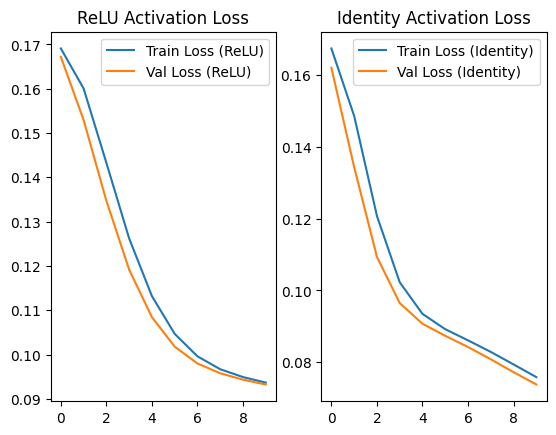

In [40]:
plt.subplot(1, 2, 1)
plt.plot(history_relu.history['loss'], label='Train Loss (ReLU)')
if 'val_loss' in history_relu.history:
    plt.plot(history_relu.history['val_loss'], label='Val Loss (ReLU)')
plt.title('ReLU Activation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_identity.history['loss'], label='Train Loss (Identity)')
if 'val_loss' in history_identity.history:
    plt.plot(history_identity.history['val_loss'], label='Val Loss (Identity)')
plt.title('Identity Activation Loss')
plt.legend()

plt.show()

In [41]:
generated_relu = model_relu.predict(X_test_normalized)
generated_identity = model_identity.predict(X_test_normalized)
height,width=28,28

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


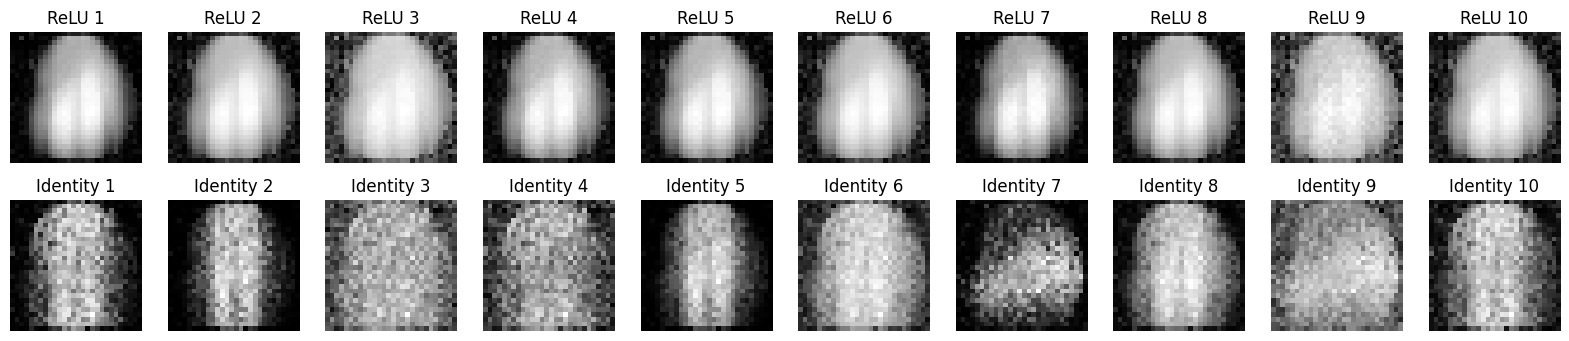

In [42]:
fig, axes = plt.subplots(2, 10, figsize=(20, 4))

for i in range(10):
    axes[0, i].imshow(np.reshape(generated_relu[i], (height, width)), cmap='gray')
    axes[0, i].set_title(f'ReLU {i+1}')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(np.reshape(generated_identity[i], (height, width)), cmap='gray')
    axes[1, i].set_title(f'Identity {i+1}')
    axes[1, i].axis('off')

plt.show()

In [43]:
train_features_relu = model_relu.predict(x_train_normalized)
train_features_identity = model_identity.predict(x_train_normalized)

test_features_relu = model_relu.predict(X_test_normalized)
test_features_identity = model_identity.predict(X_test_normalized)

a = 7


 85/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

2024-11-11 18:20:56.391533: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22579200 exceeds 10% of free system memory.


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [45]:
train_features_relu = model_relu.predict(x_train_normalized)  
train_features_identity = model_identity.predict(x_train_normalized)  

test_features_relu = model_relu.predict(X_test_normalized) 
test_features_identity = model_identity.predict(X_test_normalized)  

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [46]:
def create_mlp_classifier(input_shape, size_a):
    model = keras.Sequential([
        layers.Dense(size_a, activation='relu', input_shape=(input_shape,)),
        layers.Dense(size_a, activation='relu'),
        layers.Dense(10, activation='softmax')  
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=2e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [47]:
a = 7


In [48]:
mlp_relu = create_mlp_classifier(train_features_relu.shape[1], a)
mlp_identity = create_mlp_classifier(train_features_identity.shape[1], a)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)


In [50]:
mlp_relu.fit(train_features_relu, y_train_one_hot, epochs=200, batch_size=32, validation_split=0.2)
mlp_identity.fit(train_features_identity, y_train_one_hot, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0974 - loss: 2.3126 - val_accuracy: 0.1028 - val_loss: 2.3047
Epoch 2/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1092 - loss: 2.3020 - val_accuracy: 0.1750 - val_loss: 2.3013
Epoch 3/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1665 - loss: 2.2986 - val_accuracy: 0.1688 - val_loss: 2.3008
Epoch 4/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1469 - loss: 2.2990 - val_accuracy: 0.1681 - val_loss: 2.3005
Epoch 5/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1601 - loss: 2.2963 - val_accuracy: 0.1667 - val_loss: 2.2998
Epoch 6/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1637 - loss: 2.2955 - val_accuracy: 0.1660 - val_loss: 2.2990
Epoch 7/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1553 - loss: 2.2984 - val_accuracy: 0.1688 - val_loss: 2.2988
Epoch 8/200
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1679 - loss: 2.2952 - val_accu

In [51]:
test_loss_relu, test_accuracy_relu = mlp_relu.evaluate(test_features_relu, y_test_one_hot)
test_loss_identity, test_accuracy_identity = mlp_identity.evaluate(test_features_identity, y_test_one_hot)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2423 - loss: 2.0565
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4718 - loss: 1.2559


In [52]:
print(f'ReLU MLP Classifier Test Accuracy: {test_accuracy_relu:.4f}')
print(f'Identity MLP Classifier Test Accuracy: {test_accuracy_identity:.4f}')

ReLU MLP Classifier Test Accuracy: 0.2415
Identity MLP Classifier Test Accuracy: 0.4750


In [53]:
mlp_final = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=100, solver='adam', batch_size=128,
                          learning_rate_init=2e-5, activation='relu', random_state=42)

mlp_final.fit(x_train_normalized, y_train) 
y_pred_mlp = mlp_final.predict(X_test_normalized)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print(f"Accuracy of Part 2 MLP Classifier on Test Set: {accuracy_mlp:.4f}")

Accuracy of Part 2 MLP Classifier on Test Set: 0.8265


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
mlp_final = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=100, solver='adam', batch_size=128,
                          learning_rate_init=2e-5, activation='identity', random_state=42)

mlp_final.fit(x_train_normalized, y_train) 
y_pred_mlp = mlp_final.predict(X_test_normalized)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print(f"Accuracy of Part 2 MLP Classifier on Test Set: {accuracy_mlp:.4f}")

Accuracy of Part 2 MLP Classifier on Test Set: 0.8250


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
